#####   
<span style="font-family:Arial; font-weight:Bold; font-size:2.5em; color:#00b3e5;"> ANN Classification

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

**Example data**

Experimental **drug** was tested on **2100** individuals between **13 to 100** years old. 
<Br>
**Half** the participants are **under 65** and around **95%** of them showed **no side-effects.**
<Br>
**Half** the participants are **over 65** and around **95%** of them showed **side-effects.**

In [3]:
# making training data

In [4]:
train_samples, train_labels = [], []

for i in range(50):
    
    # The ~20% of younger individuals who did experiance side-effects
    random_younger = randint(12,35)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The ~5% of older individuals who did not experiance side-effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0) 
    
for i in range(1000):
    
    # The ~95% of younger individuals who did not experiance side-effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The ~95% of older individuals who did experiance side-effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)  
    
print( len(train_samples), train_samples[:5] )
print( len(train_labels),  train_labels[:5]  )

2100 [19, 93, 17, 68, 29]
2100 [1, 0, 1, 0, 1]


In [5]:
train_samples, train_labels = np.array(train_samples), np.array(train_labels)
train_samples, train_labels = shuffle(train_samples, train_labels)

print( len(train_samples), train_samples[:5] )
print( len(train_labels),  train_labels[:5]  )

2100 [21 60 71 93 90]
2100 [0 0 1 1 1]


In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform( train_samples.reshape(-1,1) )
scaled_train_samples[:5]

array([[0.10227273],
       [0.54545455],
       [0.67045455],
       [0.92045455],
       [0.88636364]])

In [7]:
# creating an artificial neural network

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.metrics import categorical_crossentropy
from keras.optimizers import Adam

In [9]:
model = Sequential()

model.add( Dense(units=16, input_shape=(1,)) )
model.add( Dropout(0.2) )
model.add( Activation('relu') )
          
model.add( Dense(units=32) )
#model.add( Dropout(0.2) )
model.add( Activation('relu') )

model.add( Dense(units=2) )         # units = number of classes
model.add( Activation('softmax') ) 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
 activation_2 (Activation)   (None, 2)                 0

In [10]:
# training the model

In [11]:
model.compile(
    optimizer = Adam( learning_rate=0.0001 ),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
             )

In [12]:
model.fit( x                = scaled_train_samples,
           y                = train_labels,
           epochs           = 100,
           batch_size       = 50,
           validation_split = 0.2,
           shuffle          = True,
           verbose          = 2
         )

Epoch 1/100
34/34 - 1s - loss: 0.7023 - accuracy: 0.4845 - val_loss: 0.6931 - val_accuracy: 0.5167 - 971ms/epoch - 29ms/step
Epoch 2/100
34/34 - 0s - loss: 0.6938 - accuracy: 0.4976 - val_loss: 0.6856 - val_accuracy: 0.5167 - 126ms/epoch - 4ms/step
Epoch 3/100
34/34 - 0s - loss: 0.6869 - accuracy: 0.5042 - val_loss: 0.6785 - val_accuracy: 0.5167 - 133ms/epoch - 4ms/step
Epoch 4/100
34/34 - 0s - loss: 0.6817 - accuracy: 0.5143 - val_loss: 0.6725 - val_accuracy: 0.5405 - 121ms/epoch - 4ms/step
Epoch 5/100
34/34 - 0s - loss: 0.6734 - accuracy: 0.5625 - val_loss: 0.6664 - val_accuracy: 0.5452 - 184ms/epoch - 5ms/step
Epoch 6/100
34/34 - 0s - loss: 0.6706 - accuracy: 0.5565 - val_loss: 0.6605 - val_accuracy: 0.5667 - 124ms/epoch - 4ms/step
Epoch 7/100
34/34 - 0s - loss: 0.6647 - accuracy: 0.5631 - val_loss: 0.6546 - val_accuracy: 0.5786 - 135ms/epoch - 4ms/step
Epoch 8/100
34/34 - 0s - loss: 0.6591 - accuracy: 0.5851 - val_loss: 0.6489 - val_accuracy: 0.5905 - 134ms/epoch - 4ms/step
Epoch 9

Epoch 67/100
34/34 - 0s - loss: 0.3358 - accuracy: 0.9048 - val_loss: 0.2726 - val_accuracy: 0.9429 - 108ms/epoch - 3ms/step
Epoch 68/100
34/34 - 0s - loss: 0.3355 - accuracy: 0.9030 - val_loss: 0.2704 - val_accuracy: 0.9429 - 102ms/epoch - 3ms/step
Epoch 69/100
34/34 - 0s - loss: 0.3273 - accuracy: 0.8976 - val_loss: 0.2680 - val_accuracy: 0.9429 - 108ms/epoch - 3ms/step
Epoch 70/100
34/34 - 0s - loss: 0.3358 - accuracy: 0.9000 - val_loss: 0.2660 - val_accuracy: 0.9429 - 110ms/epoch - 3ms/step
Epoch 71/100
34/34 - 0s - loss: 0.3202 - accuracy: 0.9000 - val_loss: 0.2639 - val_accuracy: 0.9429 - 106ms/epoch - 3ms/step
Epoch 72/100
34/34 - 0s - loss: 0.3229 - accuracy: 0.8994 - val_loss: 0.2622 - val_accuracy: 0.9429 - 108ms/epoch - 3ms/step
Epoch 73/100
34/34 - 0s - loss: 0.3180 - accuracy: 0.9095 - val_loss: 0.2601 - val_accuracy: 0.9429 - 110ms/epoch - 3ms/step
Epoch 74/100
34/34 - 0s - loss: 0.3192 - accuracy: 0.9131 - val_loss: 0.2582 - val_accuracy: 0.9429 - 108ms/epoch - 3ms/step


In [13]:
# making test data and predicting

In [14]:
test_samples, test_labels = [], []

for i in range(50):
    
    # The ~5% of younger individuals who did experiance side-effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The ~5% of older individuals who did not experiance side-effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(1000):
    
    # The ~95% of younger individuals who did not experiance side-effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The ~95% of older individuals who did experiance side-effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)
    
test_samples, test_labels = np.array(test_samples), np.array(test_labels)
test_samples, test_labels = shuffle(test_samples, test_labels)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform( test_samples.reshape(-1,1) )

In [23]:
prediction = model.predict(
    x          = scaled_test_samples,
    batch_size = 1000,
    verbose    = 0
    )

rounded_prediction = np.argmax( prediction, axis=-1 )
print( rounded_prediction[:5] )

[0 0 1 0 1]


In [24]:
# confusion matrix

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools

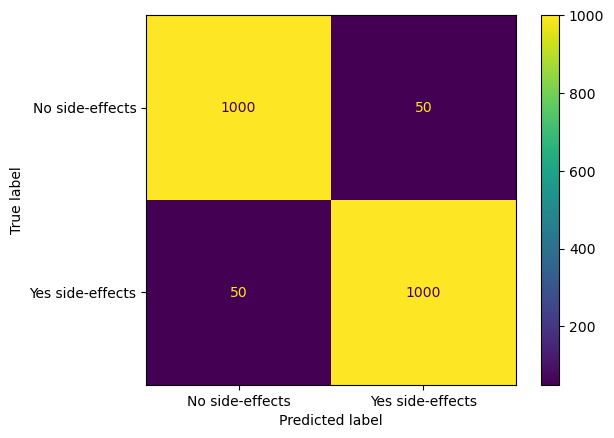

In [26]:
cm = confusion_matrix(
    y_true = test_labels,
    y_pred = rounded_prediction
    )

ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels   = ['No side-effects','Yes side-effects']
).plot()
plt.show()

#####   

#####   

#####   

#####   